# Attribute

<iframe src="https://www.youtube.com/embed/YtPaZsasmNA?start=1100" style="width:100%;height:500px;"></iframe>

```{figure} ../../figures/blanche.*
---
width: 1
height: 1
---
_AlphaFold 2 (Static Protein Configuration) vs. AlphaFold 3 (Dynamic Physiologic Issues)_. 
```


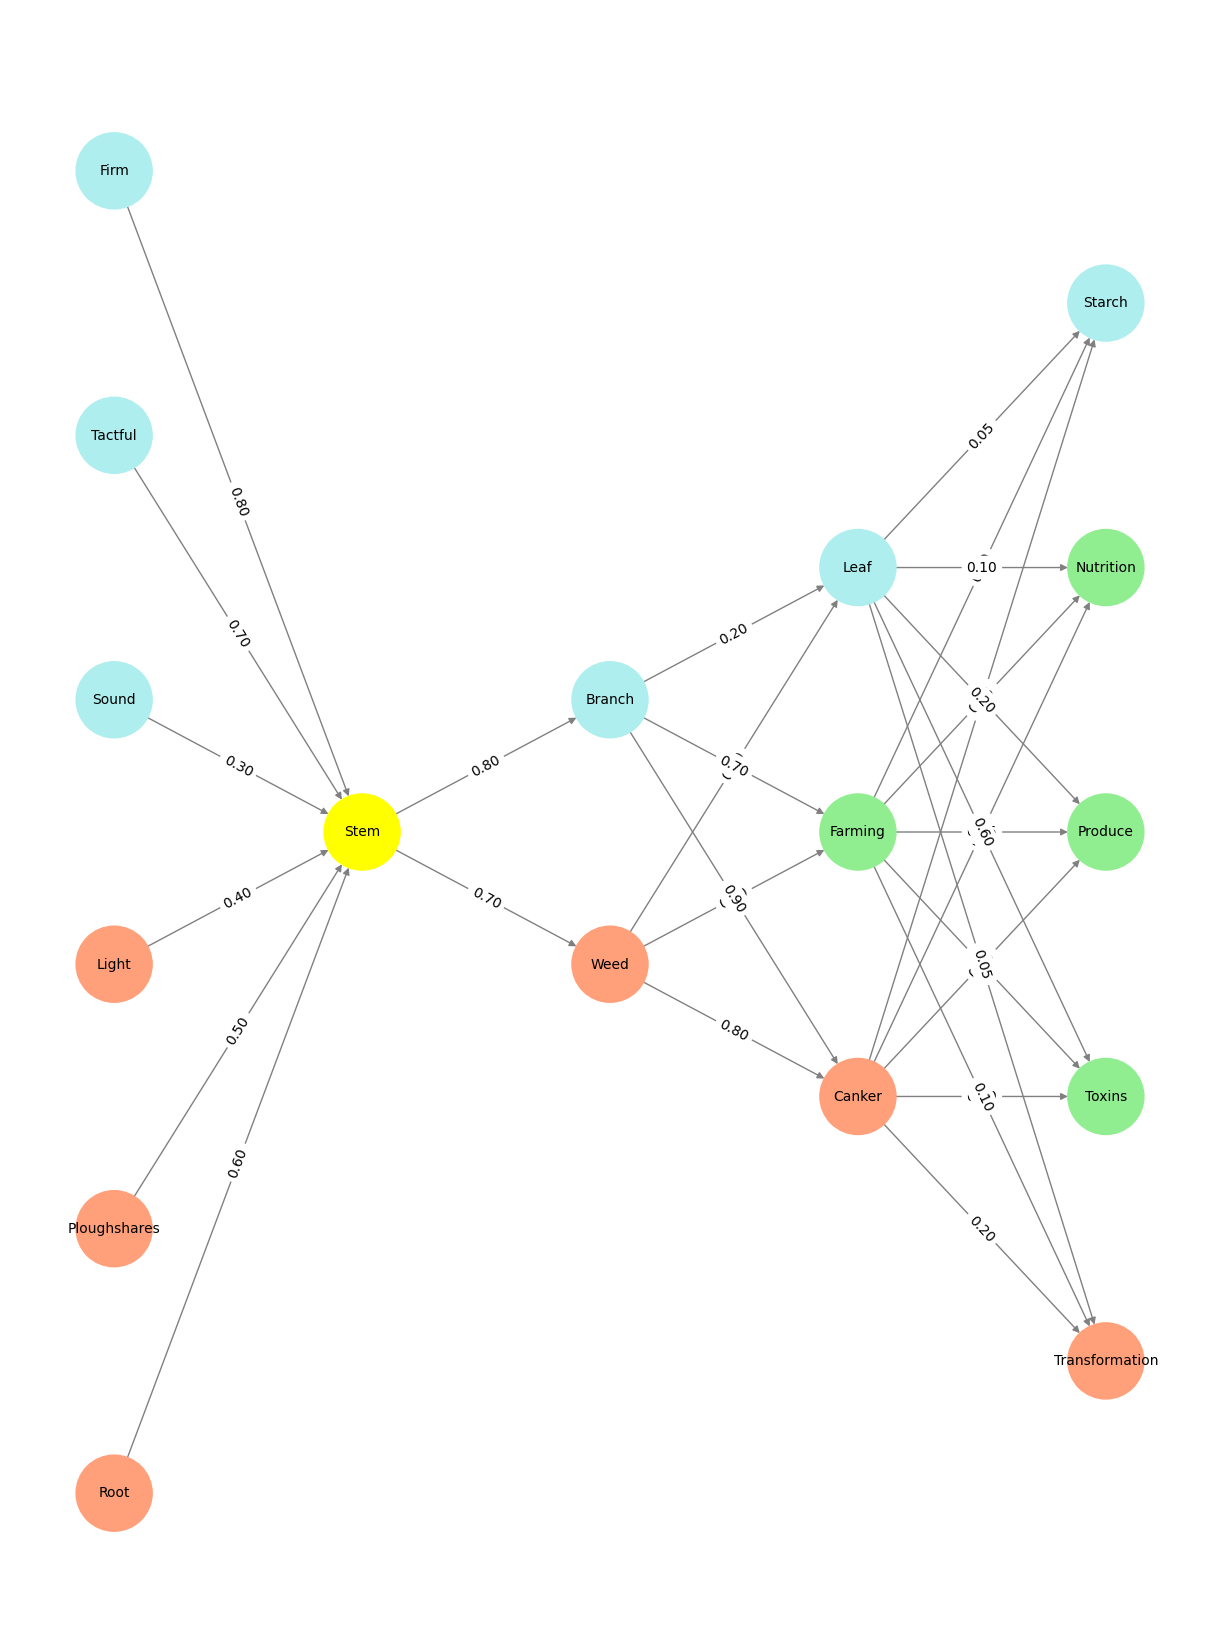

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
def define_layers():
    return {
        'Pre-Input': ['Root','Ploughshares', 'Light', 'Sound', 'Tactful', 'Firm', ],
        'Yellowstone': ['Stem'],
        'Input': ['Weed', 'Branch'],
        'Hidden': [
            'Canker',
            'Farming',
            'Leaf',
        ],
        'Output': ['Transformation', 'Toxins', 'Produce', 'Nutrition', 'Starch',    ]
    }

# Define weights for the connections
def define_weights():
    return {
        'Pre-Input-Yellowstone': np.array([
            [0.6],
            [0.5],
            [0.4],
            [0.3],
            [0.7],
            [0.8],
            [0.6]
        ]),
        'Yellowstone-Input': np.array([
            [0.7, 0.8]
        ]),
        'Input-Hidden': np.array([[0.8, 0.4, 0.1], [0.9, 0.7, 0.2]]),
        'Hidden-Output': np.array([
            [0.2, 0.8, 0.1, 0.05, 0.2],
            [0.1, 0.9, 0.05, 0.05, 0.1],
            [0.05, 0.6, 0.2, 0.1, 0.05]
        ])
    }

# Assign colors to nodes
def assign_colors(node, layer):
    if node == 'Stem':
        return 'yellow'
    if layer == 'Pre-Input' and node in ['Sound', 'Tactful', 'Firm']:
        return 'paleturquoise'
    elif layer == 'Input' and node == 'Branch':
        return 'paleturquoise'
    elif layer == 'Hidden':
        if node == 'Leaf':
            return 'paleturquoise'
        elif node == 'Farming':
            return 'lightgreen'
        elif node == 'Canker':
            return 'lightsalmon'
    elif layer == 'Output':
        if node == 'Starch':
            return 'paleturquoise'
        elif node in ['Nutrition', 'Produce', 'Toxins']:
            return 'lightgreen'
        elif node == 'Transformation':
            return 'lightsalmon'
    return 'lightsalmon'  # Default color

# Calculate positions for nodes
def calculate_positions(layer, center_x, offset):
    layer_size = len(layer)
    start_y = -(layer_size - 1) / 2  # Center the layer vertically
    return [(center_x + offset, start_y + i) for i in range(layer_size)]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    weights = define_weights()
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    center_x = 0  # Align nodes horizontally

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        y_positions = calculate_positions(nodes, center_x, offset=-len(layers) + i + 1)
        for node, position in zip(nodes, y_positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(assign_colors(node, layer_name))

    # Add edges and weights
    for layer_pair, weight_matrix in zip(
        [('Pre-Input', 'Yellowstone'), ('Yellowstone', 'Input'), ('Input', 'Hidden'), ('Hidden', 'Output')],
        [weights['Pre-Input-Yellowstone'], weights['Yellowstone-Input'], weights['Input-Hidden'], weights['Hidden-Output']]
    ):
        source_layer, target_layer = layer_pair
        for i, source in enumerate(layers[source_layer]):
            for j, target in enumerate(layers[target_layer]):
                weight = weight_matrix[i, j]
                G.add_edge(source, target, weight=weight)

    # Customize edge thickness for specific relationships
    edge_widths = []
    for u, v in G.edges():
        if u in layers['Hidden'] and v == 'Kapital':
            edge_widths.append(6)  # Highlight key edges
        else:
            edge_widths.append(1)

    # Draw the graph
    plt.figure(figsize=(12, 16))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=10, width=edge_widths
    )
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()})
    plt.title(" ")
    
    # Save the figure to a file
    # plt.savefig("figures/logo.png", format="png")

    plt.show()

# Run the visualization
visualize_nn()

```{figure} ../../figures/blanche.*
---
width: 1
height: 1
---
The structure of this neural network metaphorically mirrors a tree’s anatomy, highlighting the elegance and interconnectedness of its layers. Each layer represents a crucial element in the system's growth, function, and balance, much like the natural components of a tree. This layered structure beautifully captures the organic interplay between grounding, growth, and emergence, showcasing the elegance of neural networks as metaphors for natural and systemic complexity. We also transform the original essay into a new interpretation inspired by the neural network structure, shifting the focus to a dynamic, living ecosystem, intertwining biological, philosophical, and socio-historical themes while maintaining the metaphorical depth. We hereby integrate the metaphorical essence of the original essay but transform its tone and structure to focus on life as an ecosystem, bridging natural and conceptual systems.
```


